<a href="https://colab.research.google.com/github/fralfaro/MAT281_2024/blob/main/docs/labs/lab_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°06



<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/1200px-Anscombe%27s_quartet_3.svg.png" width="500"/>
</p>

El **cuarteto de Anscombe** es un ejemplo clásico en estadística que ilustra cómo diferentes conjuntos de datos pueden compartir las mismas propiedades estadísticas, como media, varianza y correlación, pero presentan comportamientos muy distintos cuando se visualizan gráficamente. Cada uno de los cuatro conjuntos consiste en once puntos (x, y) y fue creado por el estadístico F. J. Anscombe en 1973. Esta herramienta resalta la importancia de la visualización de datos para evitar interpretaciones erróneas basadas únicamente en análisis numéricos.

**Descripción del conjunto**

1. **Propiedades estadísticas comunes:** Todos los conjuntos tienen el mismo valor promedio para las variables \(x\) e \(y\), la misma varianza para \(x\) e \(y\), y una correlación lineal idéntica.
2. **Diferencias gráficas:** A pesar de sus similitudes estadísticas, los cuatro conjuntos presentan gráficos muy distintos:
   - El primer conjunto muestra una relación lineal simple.
   - El segundo conjunto tiene una relación no lineal, con una curva clara.
   - El tercer conjunto tiene una relación lineal clara, pero con un punto atípico que influye significativamente.
   - El cuarto conjunto tiene la mayoría de los puntos alineados verticalmente, con un punto atípico que afecta la correlación.

Este cuarteto enfatiza que las estadísticas descriptivas por sí solas pueden no capturar la esencia completa de los datos, subrayando la necesidad de utilizar visualizaciones en cualquier análisis exploratorio de datos.

In [93]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Configuración de los gráficos
%matplotlib inline
sns.set_theme(style="whitegrid")  # Establece un tema general para los gráficos
sns.set_palette("deep", desat=0.6)
plt.rcParams['figure.figsize'] = (12, 8)  # Ajuste del tamaño de las figuras

# Cargar los datos del cuarteto de Anscombe
data = sns.load_dataset("anscombe")

# Mostrar las primeras filas del conjunto de datos
data.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


Con base en la información presentada y el análisis realizado, les invitamos a reflexionar y responder las siguientes preguntas. Estas preguntas están diseñadas para profundizar en su comprensión del cuarteto de Anscombe y fomentar un análisis crítico de los datos:



1. Cree un gráfico de dispersión (scatter plot) para cada uno de los cuatro grupos del cuarteto de Anscombe. A partir de la visualización, ¿puede identificar diferencias significativas entre los grupos? ¿Qué características particulares observa en cada uno que sugieren comportamientos distintos?



<Axes: xlabel='x', ylabel='y'>

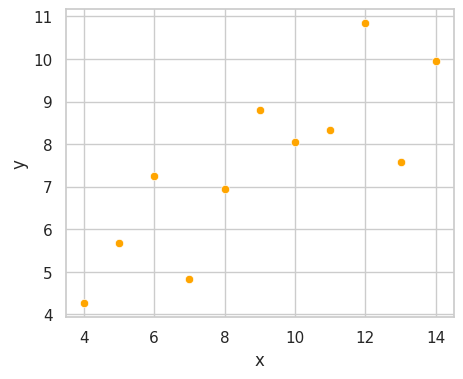

In [94]:
# Gráficos

group_1 = data[data['dataset'] == 'I']
group_2 = data[data['dataset'] == 'II']
group_3 = data[data['dataset'] == 'III']
group_4 = data[data['dataset'] == 'IV']

# Gráfico para el grupo 1
plt.figure(figsize=(5, 4))
sns.scatterplot(x='x',
                y='y',
                data=group_1,
                color='orange')

<Axes: xlabel='x', ylabel='y'>

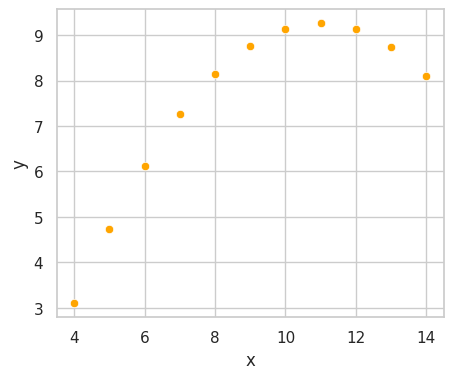

In [95]:
# Gráfico para el grupo II
plt.figure(figsize=(5, 4))
sns.scatterplot(x='x',
                y='y',
                data=group_2,
                 color='orange')

<Axes: xlabel='x', ylabel='y'>

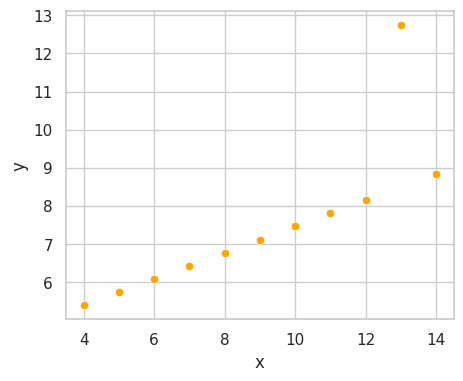

In [96]:
# Gráfico para el grupo III
plt.figure(figsize=(5, 4))
sns.scatterplot(x='x',
                y='y',
                data=group_3,
                color='orange')

<Axes: xlabel='x', ylabel='y'>

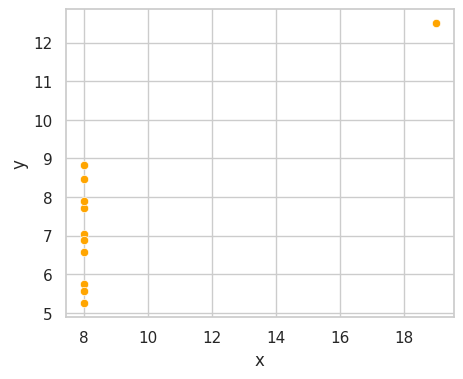

In [106]:
# Gráfico para el grupo IV
plt.figure(figsize=(5, 4))
sns.scatterplot(x='x',
                y='y',
                data=group_4,
                color='orange')

2. Utilice el comando `describe` para generar un resumen de las medidas estadísticas más relevantes para cada uno de los grupos del cuarteto de Anscombe. A partir de estos resultados, interprete las estadísticas obtenidas, destacando las características más significativas de cada grupo y cómo pueden influir en la comprensión de sus respectivas distribuciones.


In [98]:
# Creamos nuevos dataframes para cada dato, donde generamos una descriçión estadistica.

g1=group_1.describe()
# A cada descripción estadística le cambiamos el nombre de las columnas agregando el
# número del conjunto al que pertenencen
g1.columns=['xI','yI']
# Grupo II
g2=group_2.describe()
g2.columns=['xII','yII']
# Grupo 3
g3=group_3.describe()
g3.columns=['xIII','yIII']
# Grupo 4
g4=group_4.describe()
g4.columns=['xIV','yIV']
# Unimos todo en un solo DF
todo=pd.concat([g1,g2,g3,g4],axis=1)
todo

,xI,yI,xII,yII,xIII,yIII,xIV,yIV
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,9.000000,7.500909,9.000000,7.500909,9.000000,7.500000,9.000000,7.500909
std,3.316625,2.031568,3.316625,2.031657,3.316625,2.030424,3.316625,2.030579
min,4.000000,4.260000,4.000000,3.100000,4.000000,5.390000,8.000000,5.250000
25%,6.500000,6.315000,6.500000,6.695000,6.500000,6.250000,8.000000,6.170000
50%,9.000000,7.580000,9.000000,8.140000,9.000000,7.110000,8.000000,7.040000
75%,11.500000,8.570000,11.500000,8.950000,11.500000,7.980000,8.000000,8.190000
max,14.000000,10.840000,14.000000,9.260000,14.000000,12.740000,19.000000,12.500000


Notemos que las media y la desviación son las mismas para los cuatro conjuntos.
El mínimo de los datos x del cuarto grupo son el doble que el de los otros grupos. Respecto al eje y todos son distintos. El cuarto grupo es el que se mantiene constante en min, 25%, 50% y 75%, sin embargo cambia en el maximo. Esto se aprecia en el gráfico donde el último punto atípico. Los otros grupos comparten un minimo, maximo e iguales cuartiles para los datos x.

3. Ajuste un modelo de regresión lineal para cada grupo utilizando **sklearn**. Calcule las métricas de evaluación, como el error cuadrático medio (MSE) y R², y grafique los resultados de la regresión. Interprete los resultados y su impacto en la calidad del ajuste.



MSE: 1.2511536363636366^2
R^2: 0.4442788503280067


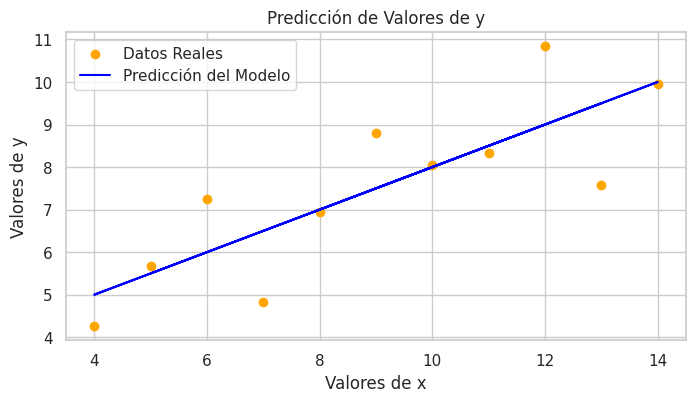

In [99]:
# Regresión lineal
model = LinearRegression(fit_intercept=True)

# Separamos los ejes
xI = group_1[['x']].copy() # como dataframe
yI = group_1['y'].copy() # como series
# Aplicar modelo a los datos
model.fit(xI, yI)
# Crear un conjunto de nuevos valores de x con etiquetas (y) desconocidas
xfit = xI.copy()

# Predecir los valores de y utilizando el modelo
yfit = model.predict(xfit)

plt.figure(figsize=(8, 4))
plt.scatter(xI,
            yI,
            label='Datos Reales',
            color='orange')  # Puntos de datos reales
plt.plot(xfit,
         yfit,
         label='Predicción del Modelo',
         color='blue')  # Línea de predicción
plt.xlabel('Valores de x')  # Etiqueta del eje x
plt.ylabel('Valores de y')  # Etiqueta del eje y
plt.title('Predicción de Valores de y')  # Título de la gráfica
plt.legend()  # Mostrar leyenda
# Error cuadrático medio
mseI = mean_squared_error(yI, yfit)
print(f"MSE: {mseI}^2")
# R^2
r2I = r2_score(yI, yfit)**2
print(f"R^2: {r2I}")
# Mostramos el gráfico
plt.show()


MSE: 1.5684809191066185
R^2: 0.6662420337274844


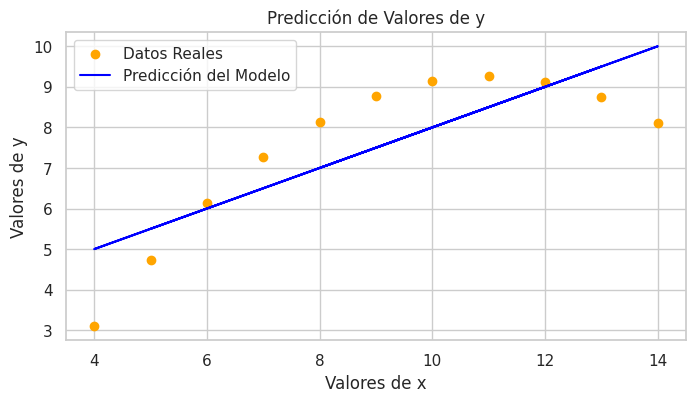

In [100]:
# Separamos los ejes
xII = group_2[['x']].copy() # como dataframe
yII = group_2['y'].copy() # como series
# Aplicar modelo a los datos
model.fit(xII, yII)
# Crear un conjunto de nuevos valores de x con etiquetas (y) desconocidas
xfit = xII.copy()

# Predecir los valores de y utilizando el modelo
yfit = model.predict(xfit)

plt.figure(figsize=(8, 4))
plt.scatter(xII,
            yII,
            label='Datos Reales',
            color='orange')  # Puntos de datos reales
plt.plot(xfit,
         yfit,
         label='Predicción del Modelo',
         color='blue')  # Línea de predicción
plt.xlabel('Valores de x')  # Etiqueta del eje x
plt.ylabel('Valores de y')  # Etiqueta del eje y
plt.title('Predicción de Valores de y')  # Título de la gráfica
plt.legend()  # Mostrar leyenda
# Error cuadrático medio
mseII = mean_squared_error(yII, yfit)**2
print(f"MSE: {mseII}")
# R^2
r2II = r2_score(yII, yfit)
print(f"R^2: {r2II}")
# Mostramos el gráfico
plt.show()

MSE: 1.5639075482529954^2
R^2: 0.6663240410665592


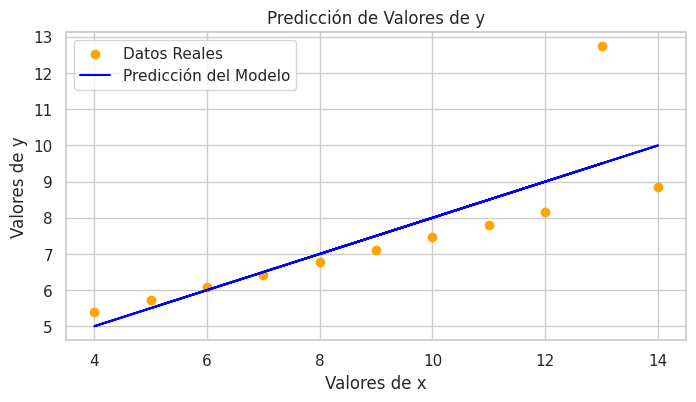

In [101]:
# Separamos los ejes
xIII = group_3[['x']].copy() # como dataframe
yIII = group_3['y'].copy() # como series
# Aplicar modelo a los datos
model.fit(xIII, yIII)
# Crear un conjunto de nuevos valores de x con etiquetas (y) desconocidas
xfit = xIII.copy()

# Predecir los valores de y utilizando el modelo
yfit = model.predict(xfit)

plt.figure(figsize=(8, 4))
plt.scatter(xIII,
            yIII,
            label='Datos Reales',
            color='orange')  # Puntos de datos reales
plt.plot(xfit,
         yfit,
         label='Predicción del Modelo',
         color='blue')  # Línea de predicción
plt.xlabel('Valores de x')  # Etiqueta del eje x
plt.ylabel('Valores de y')  # Etiqueta del eje y
plt.title('Predicción de Valores de y')  # Título de la gráfica
plt.legend()  # Mostrar leyenda
# Error cuadrático medio
mseIII = mean_squared_error(yIII, yfit)**2
print(f"MSE: {mseIII}^2")
# R^2
r2III = r2_score(yIII, yfit)
print(f"R^2: {r2III}")
# Mostramos el gráfico
plt.show()

MSE: 1.5607936479347113
R^2: 0.6667072568984653


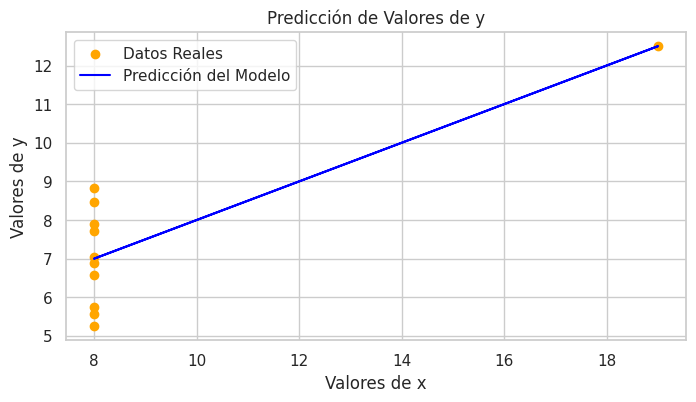

In [102]:
# Separamos los ejes
xIV = group_4[['x']].copy() # como dataframe
yIV = group_4['y'].copy() # como series
# Aplicar modelo a los datos
model.fit(xIV, yIV)
# Crear un conjunto de nuevos valores de x con etiquetas (y) desconocidas
xfit = xIV.copy()

# Predecir los valores de y utilizando el modelo
yfit = model.predict(xfit)

plt.figure(figsize=(8, 4))
plt.scatter(xIV,
            yIV,
            label='Datos Reales',
            color='orange')  # Puntos de datos reales
plt.plot(xfit,
         yfit,
         label='Predicción del Modelo',
         color='blue')  # Línea de predicción
plt.xlabel('Valores de x')  # Etiqueta del eje x
plt.ylabel('Valores de y')  # Etiqueta del eje y
plt.title('Predicción de Valores de y')  # Título de la gráfica
plt.legend()  # Mostrar leyenda
# Error cuadrático medio
mseIV = mean_squared_error(yIV, yfit)**2
print(f"MSE: {mseIV}")
# R^2
r2IV = r2_score(yIV, yfit)
print(f"R^2: {r2IV}")
# Mostramos el gráfico
plt.show()

4. Es evidente que el ajuste lineal no es adecuado para algunos grupos. Existen diversas estrategias para abordar este problema, como eliminar outliers o emplear diferentes modelos de regresión. Identifique una estrategia que podría mejorar el ajuste del modelo de regresión lineal y, si lo considera necesario, implemente otros modelos alternativos para aquellos casos donde el ajuste lineal resulte inadecuado.

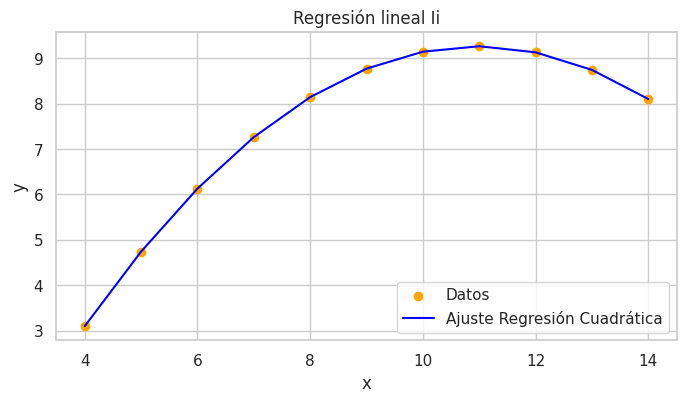

MSE: 4.138495729542357e-12
R^2: 0.9999994578574282


In [103]:
# Para el segundo buscar regresión cuadrática
# Importar la biblioteca necesaria
from sklearn.preprocessing import PolynomialFeatures
X = group_2['x'].values.reshape(-1, 1)  # Convertir a matriz 2D
y = group_2['y'].values

# Crear características polinómicas de grado 2
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Crear el modelo de regresión lineal
modelo = LinearRegression()

# Ajustar el modelo a los datos polinómicos
modelo.fit(X_poly, y)

# Hacer predicciones
y_pred = modelo.predict(X_poly)

# Graficar los puntos originales y la curva de regresión cuadrática
plt.figure(figsize=(8, 4))
plt.scatter(group_2['x'],
            group_2['y'],
            color='orange',
            label='Datos')
sns.lineplot(x=group_2['x'],
             y=y_pred,
             color='blue',
             label='Ajuste Regresión Cuadrática')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regresión lineal Ii')
plt.legend()
plt.show()
# Error cuadrático medio
mse = mean_squared_error(y_pred, group_2['y'])**2
print(f"MSE: {mse}")
# R^2
r2 = r2_score(y_pred, group_2['y'])
print(f"R^2: {r2}")


Se utilizó una regresión cuadrática con polinomialFeatures, que es lo que mejor se adapta a nuestra curva.

MSE: 5.7720526227008334e-11^2
R^2: 0.999993107581533


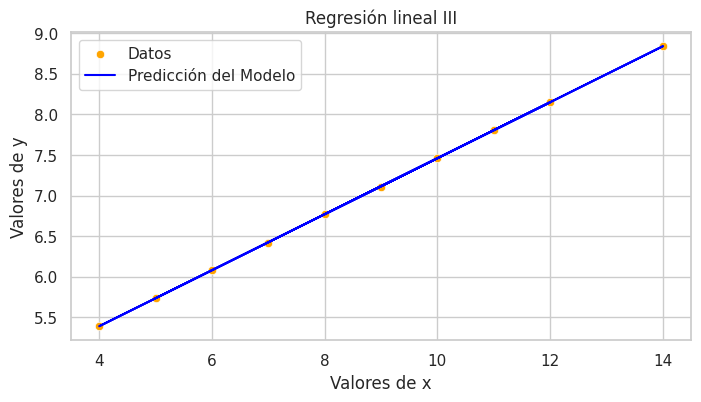

In [104]:
# Arreglamos el grupo 3, quitando el punto atípico.
group_3_fixed=group_3.drop(group_3['y'].idxmax())
# Generamos nuevamente la regresión lineal.
# Separamos los ejes
x = group_3_fixed[['x']].copy() # como dataframe
y = group_3_fixed['y'].copy() # como series
# Aplicar modelo a los datos
model.fit(x, y)
# Crear un conjunto de nuevos valores de x con etiquetas (y) desconocidas
xfit = x.copy()

# Predecir los valores de y utilizando el modelo
yfit = model.predict(xfit)

plt.figure(figsize=(8, 4))
sns.scatterplot(x=group_3_fixed['x'],
                y=group_3_fixed['y'],
                color='orange',
                label='Datos')  # Puntos de datos reales
plt.plot(xfit,
         yfit,
         label='Predicción del Modelo',
         color='blue')  # Línea de predicción
plt.xlabel('Valores de x')  # Etiqueta del eje x
plt.ylabel('Valores de y')  # Etiqueta del eje y
plt.title('Regresión lineal III')  # Título de la gráfica
plt.legend()  # Mostrar leyenda

# Error cuadrático medio
mse = mean_squared_error(y, yfit)**2
print(f"MSE: {mse}^2")
# R^2
r2 = r2_score(y, yfit)
print(f"R^2: {r2}")
# Mostramos el gráfico


Se eliminó el dato atípico y la regresión lineal quedó precisa.

MSE: 0.0
R^2: 1.0


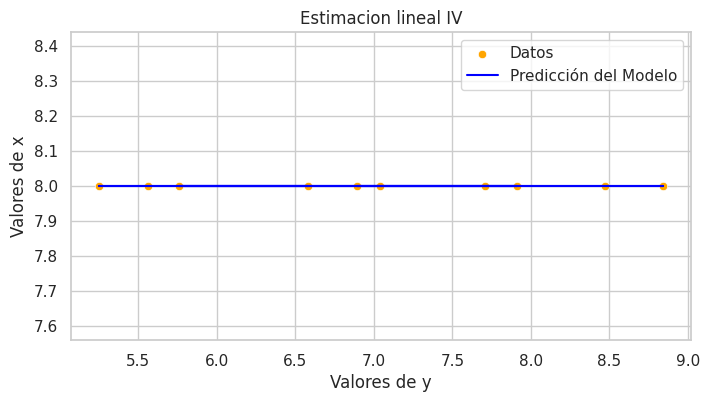

In [105]:
# Vamos a eliminar el punto atípico
group_4_fixed=group_4.drop(group_4['y'].idxmax())
# Separamos los ejes intercambiando el x con y, continuaremos el proceso
x = group_4_fixed[['y']].copy() # como dataframe
y = group_4_fixed['x'].copy() # como series
# Aplicar modelo a los datos
model.fit(x, y)
# Crear un conjunto de nuevos valores de x con etiquetas (y) desconocidas
xfit = x.copy()
# Predecir los valores de y utilizando el modelo
yfit = model.predict(xfit)
# Graficamos los ejes cambiados y la regresión para dichos ejes
plt.figure(figsize=(8, 4))
sns.scatterplot(x=group_4_fixed['y'],
             y=group_4_fixed['x'],
                color='orange',
                label='Datos')
plt.plot(xfit,
         yfit,
         label='Predicción del Modelo',
         color='blue')  # Línea de predicción
plt.xlabel('Valores de y')  # Etiqueta del eje x
plt.ylabel('Valores de x')  # Etiqueta del eje y
plt.title('Estimacion lineal IV')  # Título de la gráfica
plt.legend()  # Mostrar leyenda

# Error cuadrático medio
mse = mean_squared_error(y, yfit)**2
print(f"MSE: {mse}")
# R^2
r2 = r2_score(y, yfit)
print(f"R^2: {r2}")
# Mostramos el gráfico

Eliminamos el dato atípico. Gráficamos los valores de x e y con los ejes cambiados. Y se llega a que la mejor estimación es x=8.